In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize inputs to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images from (28, 28) to (784,)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labelsS
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
#to see how first image look

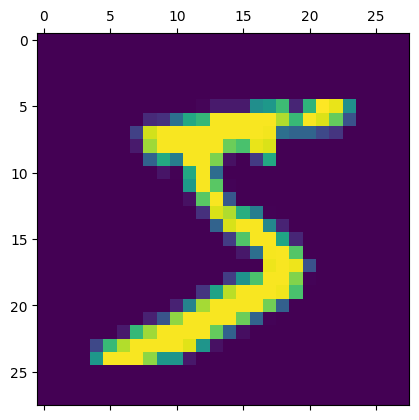

In [ ]:
plt.matshow(x_train[0].reshape(28, 28))
plt.show()


In [ ]:
#normalize the images by scaling pixel intensities to the range 0,1

In [ ]:
# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/20
375/375 - 5s - 15ms/step - accuracy: 0.7120 - loss: 1.2635 - val_accuracy: 0.8691 - val_loss: 0.6136
Epoch 2/20
375/375 - 3s - 9ms/step - accuracy: 0.8729 - loss: 0.5160 - val_accuracy: 0.8949 - val_loss: 0.4022
Epoch 3/20
375/375 - 4s - 10ms/step - accuracy: 0.8929 - loss: 0.3957 - val_accuracy: 0.9072 - val_loss: 0.3413
Epoch 4/20
375/375 - 4s - 12ms/step - accuracy: 0.9035 - loss: 0.3463 - val_accuracy: 0.9131 - val_loss: 0.3095
Epoch 5/20
375/375 - 4s - 10ms/step - accuracy: 0.9114 - loss: 0.3165 - val_accuracy: 0.9191 - val_loss: 0.2867
Epoch 6/20
375/375 - 5s - 14ms/step - accuracy: 0.9174 - loss: 0.2947 - val_accuracy: 0.9246 - val_loss: 0.2699
Epoch 7/20
375/375 - 5s - 14ms/step - accuracy: 0.9216 - loss: 0.2779 - val_accuracy: 0.9277 - val_loss: 0.2574
Epoch 8/20
375/375 - 5s - 13ms/step - accuracy: 0.9254 - loss: 0.2635 - val_accuracy: 0.9311 - val_loss: 0.2457
Epoch 9/20
375/375 - 6s - 16ms/step - accuracy: 0.9293 - loss: 0.2511 - val_accuracy: 0.9342 - val_loss: 

In [ ]:
#Evalute the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.9520 - loss: 0.1684
Test accuracy: 0.9520


In [ ]:
#Making Prediction on New Data

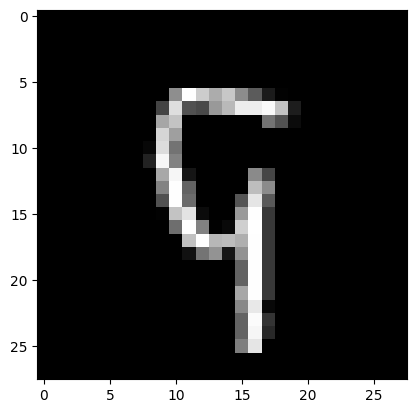

In [ ]:
import random
import matplotlib.pyplot as plt

n = random.randint(0, 99)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.show()


In [ ]:
#Plot graph for Accurancy and Loss

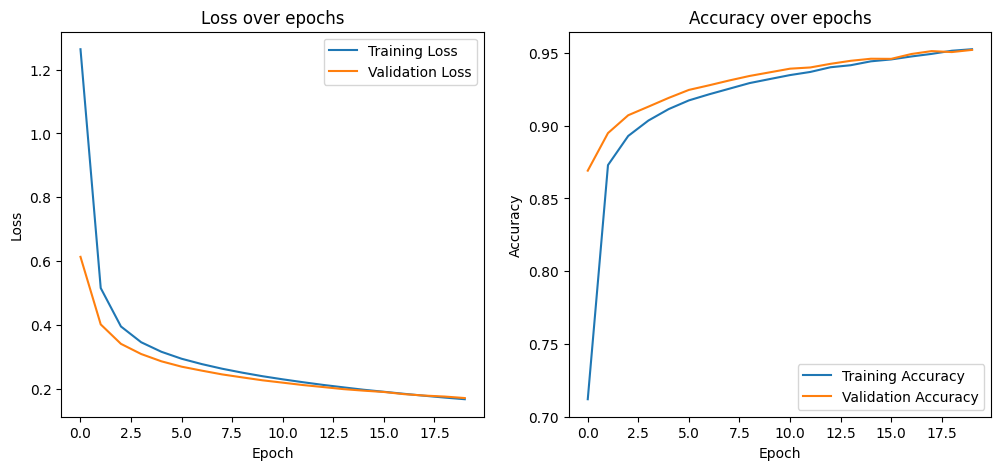

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
